In [1]:
import matplotlib
#matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pyplot as plt
from collections import defaultdict, OrderedDict


import os
import sys
import re
import numpy as np
import pandas as pd
import scipy.optimize
rmg_path = os.getenv('RMGpy')
if rmg_path and rmg_path not in sys.path:
    sys.path.insert(1,rmg_path)

#import Image


rmg_path = os.getenv('RMGpy')
if rmg_path and rmg_path not in sys.path:
    sys.path.insert(1,rmg_path)

import rmgpy.kinetics
import rmgpy.reaction
from rmgpy.species import Species
from rmgpy.data.rmg import RMGDatabase 
from rmgpy.molecule import Molecule, Bond, Atom
from rmgpy.reaction import Reaction
from rmgpy.kinetics import Arrhenius, MultiArrhenius

In [17]:
def evalArrhenius(autoTSTExpression):
    if autoTSTExpression is np.nan:
        return autoTSTExpression
    try:
        my_string = str(autoTSTExpression).strip("'")
        print my_string
        result = eval(my_string, {}, {'Arrhenius': rmgpy.kinetics.Arrhenius,
                                     'MultiArrhenius': rmgpy.kinetics.MultiArrhenius,
                                     'PDepArrhenius': rmgpy.kinetics.PDepArrhenius,})
    except:
        result = autoTSTExpression
        raise
    return result

def RateCoefficients(arrhenius):
    rate = np.nan
    try:
        rate = arrhenius.getRateCoefficient(T=1000, P=1e5)
        print "Rate Calculated"
    except:
        print "No rate to calculate"
        pass
    return rate

In [23]:
directory = '/gss_gpfs_scratch/harms.n/comparerTST'
results = defaultdict(OrderedDict)
comparerFiles = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
k = 0
for fil in comparerFiles:
    if ".log" and "updated" in fil:
        k += 1
print k
results = defaultdict(OrderedDict)
not_ooh_abstraction = []
autoTST = {}
for i in range(1,k+1):
    r = results[i]
    filename = 'AutoTST-comparer.updated.{0:d}.combined.log'.format(i)
    filepath = os.path.join(directory,filename)
    with open(filepath) as f:
        lines = f.readlines()
    
    for j,l in enumerate(lines):
        m = re.match('comparerTST.py:146 performCalcs INFO chemkinRxn: (.*)', l)
        n = re.match('comparerTST.py:221 performCalcs INFO We have calculated kinetics (.*)', l)
        if m:
            rxn = eval(m.group(1))
            if [Molecule(SMILES="[O]O"), Molecule(SMILES="OO")] in rxn.pairs or [Molecule(SMILES="OO"), Molecule(SMILES="[O]O")] in rxn.pairs:
                r["Reaction"] = rxn
            else:
                not_ooh_abstraction.append(rxn)
            
        if n:
            r["AutoTST Kinetics"] = eval(n.group(1))#np.log(evalArrhenius(n.group(1)).getRateCoefficient(T=1000, P=1e5))

    #if "Reaction" in r.keys() and "AutoTST Kinetics" in r.keys():


999


In [28]:
results = pd.DataFrame(results).T
results[results["AutoTST Kinetics"] > -1]

,AutoTST Kinetics,Reaction
10,"Arrhenius(A=(0.265705,'cm^3/(mol*s)'), n=3.960...","<Molecule ""[O]O""> + <Molecule ""C=C""> <=> <Mole..."
13,"Arrhenius(A=(9.59731e-06,'cm^3/(mol*s)'), n=4....","<Molecule ""[CH]=O""> + <Molecule ""OO""> <=> <Mol..."
14,"Arrhenius(A=(4.25716e-06,'cm^3/(mol*s)'), n=5....","<Molecule ""C=O""> + <Molecule ""[O]O""> <=> <Mole..."
15,"Arrhenius(A=(0.00263746,'cm^3/(mol*s)'), n=3.9...","<Molecule ""C[CH2]""> + <Molecule ""OO""> <=> <Mol..."
16,"Arrhenius(A=(0.00110227,'cm^3/(mol*s)'), n=4.6...","<Molecule ""CC""> + <Molecule ""[O]O""> <=> <Molec..."
20,"Arrhenius(A=(0.00355603,'cm^3/(mol*s)'), n=3.8...","<Molecule ""[CH2]O""> + <Molecule ""OO""> <=> <Mol..."
21,"Arrhenius(A=(8.65209e-05,'cm^3/(mol*s)'), n=4....","<Molecule ""CO""> + <Molecule ""[O]O""> <=> <Molec..."
22,"Arrhenius(A=(8.65209e-05,'cm^3/(mol*s)'), n=4....","<Molecule ""CO""> + <Molecule ""[O]O""> <=> <Molec..."
28,"Arrhenius(A=(1.53379e-06,'cm^3/(mol*s)'), n=4....","<Molecule ""C#C[CH2]""> + <Molecule ""OO""> <=> <M..."
29,"Arrhenius(A=(9.02065e-08,'cm^3/(mol*s)'), n=5....","<Molecule ""C#CC""> + <Molecule ""[O]O""> <=> <Mol..."


In [3]:
rxn = Reaction(reactants=[Molecule(SMILES="CCCCC(C)C(C)O[O]"), Molecule(SMILES="OO")], products=[Molecule(SMILES="CCCCC(C)C(C)OO"), Molecule(SMILES="[O]O")], degeneracy=2, pairs=[[Molecule(SMILES="CCCCC(C)C(C)O[O]"), Molecule(SMILES="CCCCC(C)C(C)OO")], [Molecule(SMILES="OO"), Molecule(SMILES="[O]O")]])

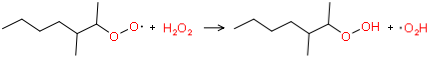

In [6]:
rxn

In [14]:
if [Molecule(SMILES="[O]O"), Molecule(SMILES="OO")] in rxn.pairs or [Molecule(SMILES="OO"), Molecule(SMILES="[O]O")] in rxn.pairs:
    print "Yay"

Yay
